01. Import Data and Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/kevinclancy/Desktop/Master Folder'

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [29]:
df.dtypes

order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
last_order                float64
first_order                  bool
product_id                float64
add_to_cart_order         float64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_spend             float64
spend_flag                 object
frequent_customer         float64
frequency_flag             object
first_name                 object
last_name                  object
Gender                     object
State                      object
Age                         int64
date_joined                object
dependants    

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order,first_order,product_id,add_to_cart_order,product_name,...,first_name,last_name,Gender,State,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


02. Order Hour of Day

Text(0.5, 1.0, 'Orders by Hour of the Day')

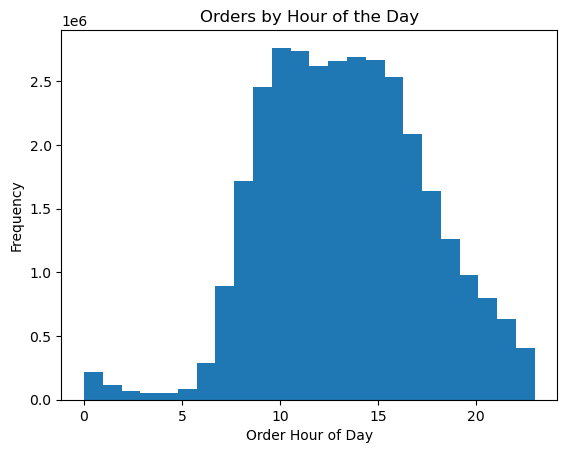

In [5]:
# create histogram
hist = df['order_hour_of_day'].plot.hist(bins = 24)

plt.xlabel('Order Hour of Day')
plt.title ('Orders by Hour of the Day')

The histogram above displays the distribution frequency of each hour in the dataframe, with the highest frequencies occuring from 9 to 16. 

In [6]:
# export histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_freq_hour_dow.png'))

03. Customer Loyalty

In [7]:
# group loyalty_flag and order_id 
df_cust_loyal = df.groupby('loyalty_flag')['order_id'].nunique().reset_index(drop=False)

In [8]:
# check output
df_cust_loyal

,loyalty_flag,order_id
0,Loyal customer,1024517
1,New customer,637048
2,Regular customer,1553120


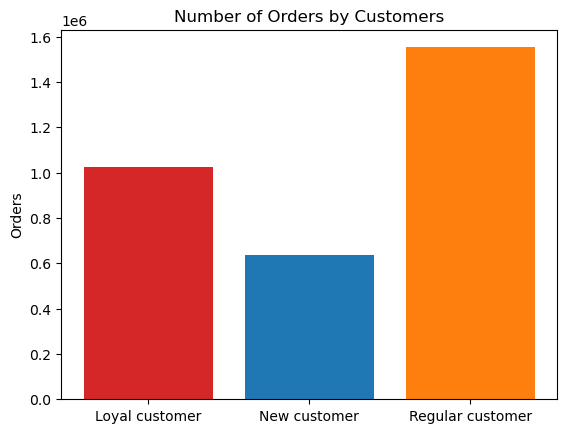

In [9]:
# create bar chart for df_cust_loyal
fig, ax = plt.subplots()

loyalty_flag = ['Loyal customer', 'New customer', 'Regular customer']
counts = [1024517, 637048, 1553120]
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(loyalty_flag, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Orders')
ax.set_title('Number of Orders by Customers')

plt.show()

Regular customers place the most orders, followed by loyal customers and new customers.

In [10]:
# export bar chart 
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_dow.png'))

04. Expenditure

In [11]:
# set seed 
np.random.seed(4)

In [12]:
# create list to the test np.random.rand() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [13]:
# store 70% of df
big = df[dev]

In [14]:
# store 30% of df
small = df[~dev]

In [15]:
# check len
len(df)

32404859

In [16]:
# check len of big + small
len(big) + len(small)

32404859

In [17]:
# reduce sample to only necessary columns
df_expend = small[['order_hour_of_day', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Prices by Hour of the Day')

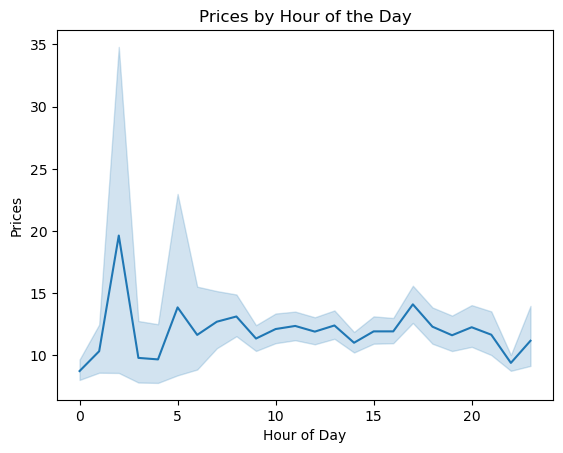

In [30]:
# create line chart for expenditure
lines = sns.lineplot(data = df_expend, x = 'order_hour_of_day', y = 'prices')

plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.title('Prices by Hour of the Day')

In [31]:
lines.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expend_hour_dow.png'))

05. Age and Dependants

In [20]:
# determine if theres a connection between age and number of dependants
df_age = small[['dependants', 'Age']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Dependants by Customer Age')

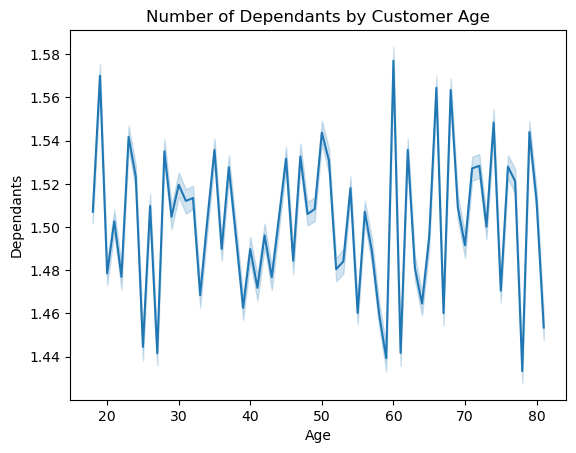

In [21]:
# create line chart
line = sns.lineplot(data = df_age, x = 'Age', y = 'dependants')

plt.xlabel('Age')
plt.ylabel('Dependants')
plt.title('Number of Dependants by Customer Age')

The line chart above doesn't indicate any correlation between the number of dependants and age.

In [22]:
# export age/dependants chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_dow.png'))

06. Age and Income

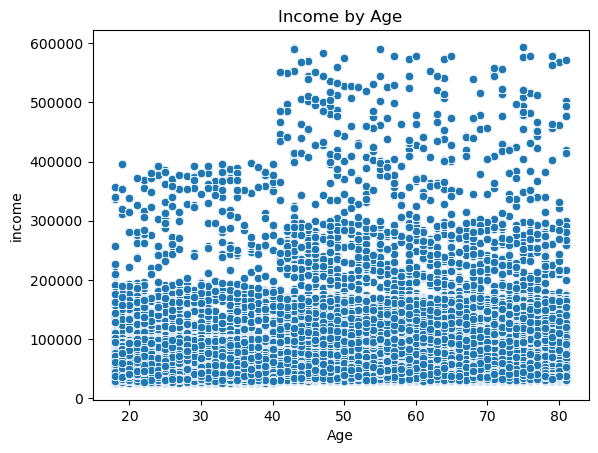

In [23]:
# create scatterplot to see if there is a connection between age and income
scatterplot = sns.scatterplot(x = 'Age', y = 'income', data = df).set_title("Income by Age")

Density is highest across all ages from 0 - 200000. From 200,000-400,000 we see far less plots among ages 20-40 compared to those 40+. Above 400,000 we see far fewer overall plots and zero in anyone under the age of 40.  

In [24]:
# check income mean
df['income'].mean()

99437.73329450376

In [25]:
df['income'].median()

96618.0

In [26]:
df['income'].max()

593901

In [27]:
# export income age scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income_age_dow.png'))